<a href="https://colab.research.google.com/github/joohoshin/TensorflowAI/blob/main/24_2_Noise_%EC%A0%9C%EA%B1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AutoEncoder

https://www.tensorflow.org/tutorials/generative/autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Conv2DTranspose

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose

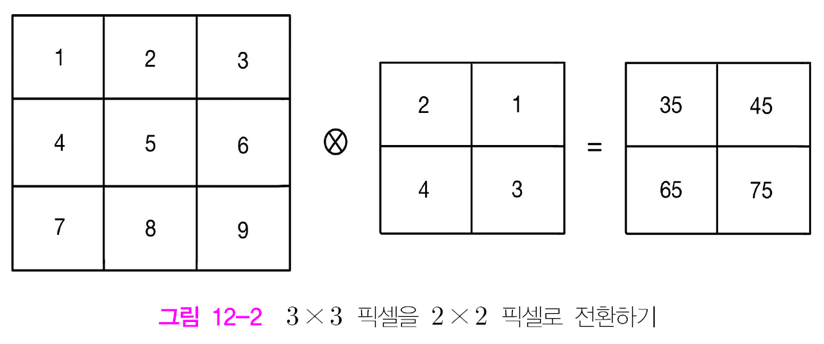

In [19]:
from IPython.display import Image
Image('/content/drive/MyDrive/Tensorflow AI/Conv.png', width = 400)
# 이미지 출처: 텐서플로 케라스를 이용한 딥러닝, 박유성

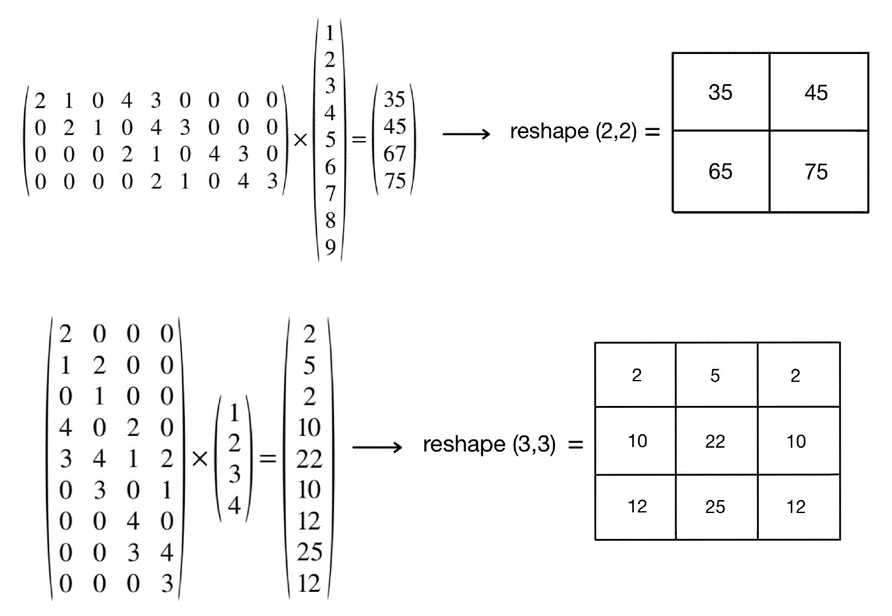

In [21]:
Image('/content/drive/MyDrive/Tensorflow AI/ConvT.png', width = 400)
# 이미지 출처: 텐서플로 케라스를 이용한 딥러닝, 박유성

In [3]:
encoder = models.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)                             
])

decoder = models.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')                             
])


In [4]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
model = models.Sequential([encoder, decoder])
model.compile(loss='MSE', optimizer = 'adam')
history = model.fit(x_train, x_train, epochs=10, validation_data = (x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0293 - val_loss: 0.0050
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0045 - val_loss: 0.0035
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.002

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 7, 7, 8)           1320      
_________________________________________________________________
sequential_1 (Sequential)    (None, 28, 28, 1)         1897      
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


노이즈가 있는 이미지를 만들어보자

In [7]:
noise = np.random.normal(loc=0, scale=0.3, size = x_test.shape )

In [8]:
noise.shape

(10000, 28, 28, 1)

In [9]:
x_test_noise = x_test + noise

In [10]:
recon = model.predict(x_test_noise)

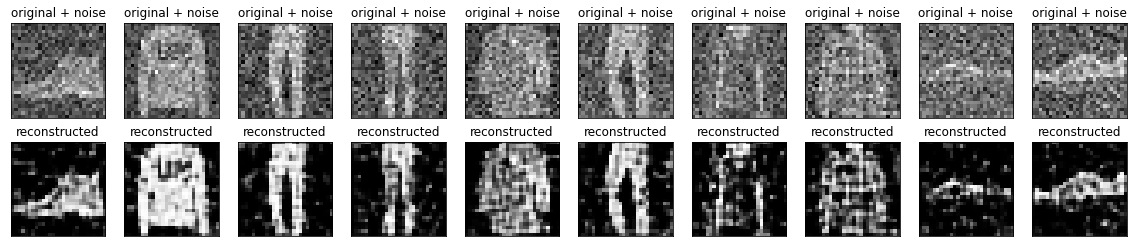

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(recon[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

### 노이즈가 있는 데이터셋으로 training부터 해보고 비교해보자

In [12]:
noise2 = np.random.normal(loc=0, scale=0.3, size = x_train.shape )  

In [13]:
x_train_noise = x_train + noise2

In [14]:
model = models.Sequential([encoder, decoder])
model.compile(loss='MSE', optimizer = 'adam')
history = model.fit(x_train_noise, x_train, epochs=10, validation_data = (x_test_noise, x_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0140 - val_loss: 0.0118
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0111 - val_loss: 0.0109
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - val_loss: 0.0107
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0106 - val_loss: 0.0106
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0104
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

In [15]:
recon = model.predict(x_test_noise)

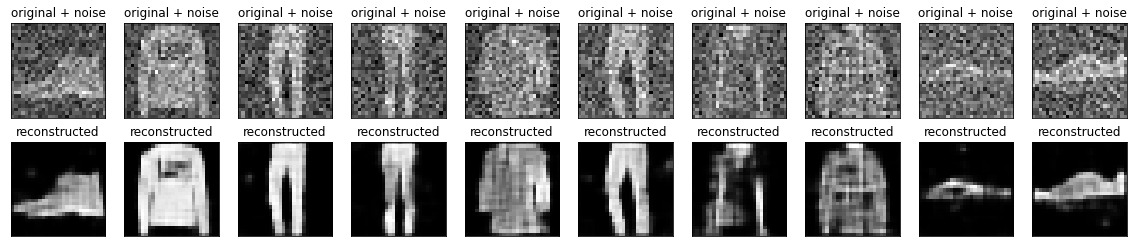

In [16]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noise[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(recon[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()